In [1]:
import matplotlib.pyplot as plt
import torch
import pytorch_measure as pm
import numpy as np
N = 17 # number of weights
M = 1000 # Number of datapoints
verbose = True
dev = 'cpu'

torch.manual_seed(1)

def regression_model(a,x):
    return a+x

x = torch.linspace(0, 10, M)
data = regression_model(torch.randn(M).to(dev) - 2, x)
#data = -2 + x.view(-1,1) + torch.from_numpy(np.random.normal(0,1,(M,1))).float() # The way of the Sergei

w = torch.rand(N,dtype=torch.float).to(dev)
w = torch.nn.parameter.Parameter(w/w.sum())
l = torch.linspace(-5, 3, N, requires_grad=False).to(dev)

index = []
for i in range(M):
    ab = (regression_model(l, x[i]) - data[i]).abs()
    index.append(torch.argmin(ab))

def NLLLoss(m:list[pm.Measure]):
    return -(m[0].weights[index]).log().sum()

sd = (l[index] - data)**2
def WardLoss(w):
    return sum(sd * w[index])

def K(d):
        return 1/np.sqrt(2*np.pi)*np.exp(-d**2/2)
h=1.06*M**(-1/5)
kde_mat = K((regression_model(l, x.view(-1,1)) - data.view(-1,1)) / h)

#a = torch.sum(kde_mat, dim=0)

def KDENLLLoss(m):
    return -(torch.matmul(kde_mat ,m[0].weights.view(-1,1))/(M*h)).log().sum()

Epoch: 0          Loss: 2866.914062500 LR: 0.100000000
Epoch: 1          Loss: 2618.158447266 LR: 0.100000000
Epoch: 2          Loss: 2501.024414062 LR: 0.100000000
Epoch: 3          Loss: 2316.240478516 LR: 0.100000000
Epoch: 4          Lr was reduced to: 0.010000000
Epoch: 5          Loss: 2348.900146484 LR: 0.010000000
Epoch: 6          Loss: 2328.055664062 LR: 0.010000000
Epoch: 7          Loss: 2313.607910156 LR: 0.010000000
Epoch: 8          Loss: 2295.229492188 LR: 0.010000000
Epoch: 9          Loss: 2278.826171875 LR: 0.010000000
Epoch: 10         Loss: 2264.108886719 LR: 0.010000000
Epoch: 11         Loss: 2250.909912109 LR: 0.010000000
Epoch: 12         Lr was reduced to: 0.001000000
Epoch: 13         Loss: 2239.392578125 LR: 0.001000000
Epoch: 14         Loss: 2238.158203125 LR: 0.001000000
Epoch: 15         Loss: 2236.938964844 LR: 0.001000000
Epoch: 16         Loss: 2235.735107422 LR: 0.001000000
Epoch: 17         Loss: 2234.546875000 LR: 0.001000000
Epoch: 18         Loss

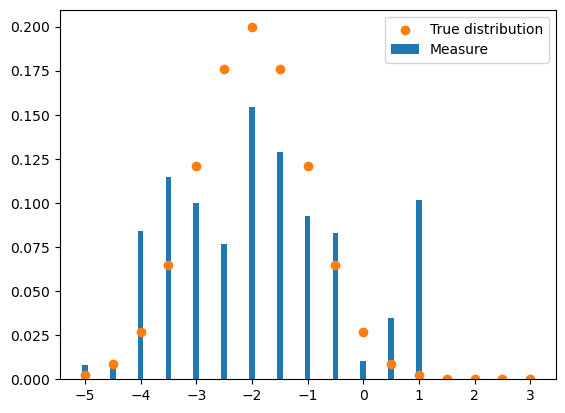

In [2]:
measure = pm.Measure(locations=l, weights=w, device=dev)
opt = pm.Optimizer([measure], lr=1e-1)
opt.minimize(NLLLoss, verbose=True, print_freq=1, max_epochs=10000, tol_const=1e-2)

plt.plot()

mu=0 #Create true values
sigma=1
xs = l.detach()
y=1/(np.sqrt(2*np.pi)*sigma)*torch.exp(-(xs+2-mu)**2/(2*sigma**2))
y/=sum(y) #Normalize


measure.visualize()
#plt.bar(l-0.1, torch.sum(kde_mat, dim=0)/torch.sum(kde_mat), zorder=0, width=0.1)
plt.scatter(xs, y, zorder=2, label="True distribution")
plt.legend()

plt.show()
#LR         to 1e-4             to 1e-5
#1e-3  -  2147.958496094        2145.816650391
#1e-2  -  2147.958496094        2145.816650391
#1e-1  -  2149.463867188        2145.826660156

In [3]:
import Sergei.torch_measure as s

mes = s.TorchMeasure(l, w)
opt = s.MeasureMinimizer(mes, KDENLLLoss, learning_rate=1e-1)
opt.minimize()


plt.scatter(xs, y, zorder=2)
plt.bar(l, mes.weights.detach())

ModuleNotFoundError: No module named 'Sergei'